<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ" data-toc-modified-id="Первичный-анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ</a></span><ul class="toc-item"><li><span><a href="#Contract" data-toc-modified-id="Contract-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Contract</a></span></li><li><span><a href="#Personal" data-toc-modified-id="Personal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Personal</a></span></li><li><span><a href="#Internet" data-toc-modified-id="Internet-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Internet</a></span></li><li><span><a href="#Phone" data-toc-modified-id="Phone-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Phone</a></span></li></ul></li><li><span><a href="#Анализ-объединённых-данных" data-toc-modified-id="Анализ-объединённых-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ объединённых данных</a></span><ul class="toc-item"><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Объединение данных</a></span></li><li><span><a href="#Генерирование-новых-признаков" data-toc-modified-id="Генерирование-новых-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Генерирование новых признаков</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li></ul></li><li><span><a href="#Построение-модели-предсказания-оттока-клиентов" data-toc-modified-id="Построение-модели-предсказания-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели предсказания оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Отбор-признаков" data-toc-modified-id="Отбор-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Отбор признаков</a></span></li><li><span><a href="#Деление-на-выборки" data-toc-modified-id="Деление-на-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Деление на выборки</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Градиентный бустинг</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Тестрование-модели" data-toc-modified-id="Тестрование-модели-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Тестрование модели</a></span></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li></ul></li></ul></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Заключение</a></span></li></ul></div>

# Проект "Прогнозирование оттока клиентов телеком-компании"

**Цель проекта:** снижение оттока клиентов на основе предсказания потенциального ухода клиента

**План работ:**

1. Провести первичную обработку и анализ данных.
2. Объединить данные в единую таблицу. Выделить в данных признаки и таргет.
3. Разбить данные на тренировочную, валидационную и тестовую выборки.
4. Построить модель (несколько моделей) для предсказания класса объекта (например: 1 - клиент уйдёт, 0 - клиент останется).
5. Проверить модель на тестовой выборке.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

## Первичный анализ

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

import lightgbm as lgb

### Contract

In [2]:
# импорт данных

try:
    contract = pd.read_csv('contract_new.csv', parse_dates=[1])
except:
    contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv', parse_dates=[1])
    
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [3]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


В таблице с контрактами присутствует 7043 записи, пропусков нет. Необходимо преобразовать тип данных в колонках с датами.

В колонке EndDate заменю тип данных на datetime. Значение No заменю на отсутствие даты.

In [4]:
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

Заменю тип данных в колонке TotalCharges на float

In [5]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract['TotalCharges'] = contract['TotalCharges'].fillna(0.0)

In [6]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [7]:
contract.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2115.312885
std,30.090047,2112.742814
min,18.250000,0.000000
25%,35.500000,436.750000
50%,70.350000,1343.350000
75%,89.850000,3236.690000
max,118.750000,9221.380000


In [8]:
contract['BeginDate'].min(), contract['BeginDate'].max()

(Timestamp('2013-10-01 00:00:00'), Timestamp('2020-02-01 00:00:00'))

### Personal

In [9]:
try:
    personal = pd.read_csv('personal_new.csv')
except:
    personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [10]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Таблица содержит 7043 записей, столько же сколько заключено договоров. Пропусков нет. Необходимо привести поля к релевантному типу данных.

### Internet

In [11]:
try:
    internet = pd.read_csv('internet_new.csv')
except:
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Данные содержат 5517 записей. Пропусков нет. Необходимо привести столбцы к релевантному типу данных.

### Phone

In [13]:
try:
    phone = pd.read_csv('phone_new.csv')
except:
    phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')
    
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [14]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Данные содержат 6361 запись. Пропусков нет.

**Вопросы:**

1) Что значат колонки SeniorCitizen и Dependents в таблице personal_new?
2) Так понимаю, что таргет вычисляется по полю EndDate в таблице contracts: есть дата конца контракта - клиент ушёл, нет даты - договор продолжается.
3) На какую метрику обращать внимание: accuracy, f1, roc-auc?
4) Какое должно быть значение выбранной метрики на тестовой выборке для принятия прототипа?

## Анализ объединённых данных

### Объединение данных

Для дальнейшей работы необходимо объединить загруженные таблицы в одну единственную таблицу со всеми данными. Т.к. анализируются договоры и вероятность их расторжения, буду присоединять таблицы с дополнительными данными к таблице с договорами с помощью поля customerID.

In [15]:
data = (contract.merge(personal, on='customerID', how='left')
        .merge(internet, on='customerID', how='left')
        .merge(phone, on='customerID', how='left'))


data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

Т.к. дополнительные услуги доступны только пользователям интернета, нет смысла заполнять пропуски для абонентов, у которых нет интернета. Пропуск будет маркировать, что пользователям без интернета данные услуги недоступны. Таким же образом, услуга подключения к нескольким линиям будет недоступна пользователям без телефонной связи.

### Генерирование новых признаков

В первую очередь необходимо чётко выделить таргет: расторгнул абонент договор или нет.

In [17]:
data['ContractEnd'] = np.where(data['EndDate'].isnull(), 0, 1)
data['ContractEnd'].sum()

1101

1101 клиент разорвал договор из 7043 клиентов

Сгенерирую дополнительные признаки на основе имеющихся данных

In [18]:
# Посчитаю количество дней, в течение которых абоненты пользуются/пользовались услугами компании по состоянию на 1 февраля 2020 года

data['Duration'] = np.where(data['EndDate'].isna(),
                            pd.to_datetime('2020-02-01') - data['BeginDate'],
                            data['EndDate'] - data['BeginDate'])

data['Duration'] = data['Duration'].dt.days
data['Duration']

0         31
1       1036
2        123
3       1371
4        153
        ... 
7038     730
7039    2191
7040     337
7041     215
7042    2010
Name: Duration, Length: 7043, dtype: int64

In [19]:
# Добавлю признак, является ли абонент пользователем интернета, телефона, или обеих основных услуг

conditions = [
    (data['InternetService'].notna()) & (data['MultipleLines'].notna()),
    (data['InternetService'].notna()),
    (data['MultipleLines'].notna())
]

choices = ['All', 'Internet', 'Phone']

data['MainService'] = np.select(conditions, choices)

data['MainService'].value_counts(normalize=True, dropna=False)

All         0.686497
Phone       0.216669
Internet    0.096834
Name: MainService, dtype: float64

Таким образом видно, что 68.6% абонентов пользуются обеими услугами, 21.7% пользователей пользуются только телефоном и 9.7% абонентов пользуются только телефоном.

### Исследовательский анализ

Т.к. главная задачей является сократить отток абонентов, необходимо выяснить, почему это происходит. Для этого проведу когортный анализ: сравню ушедших клиентов и действующими клиентами.

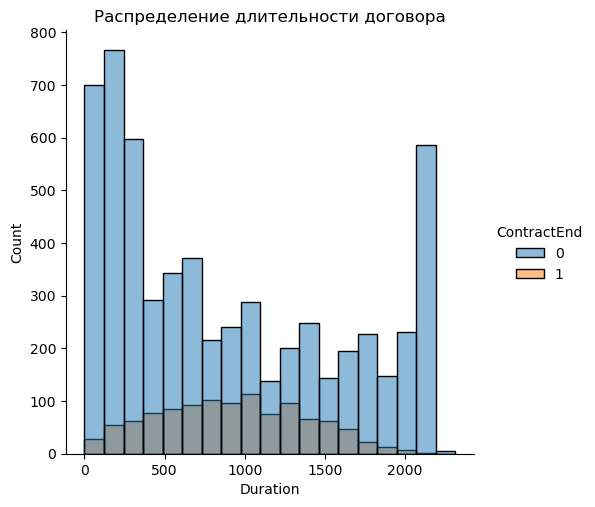

In [20]:
sns.displot(data, x='Duration', hue='ContractEnd').set(
    title='Распределение длительности договора');

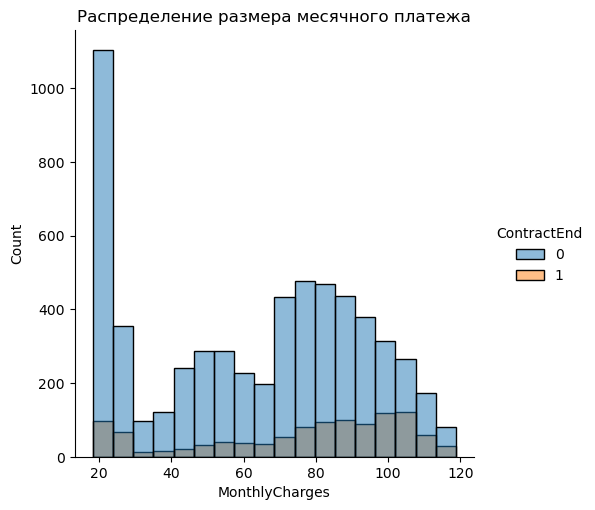

In [21]:
sns.displot(data, x='MonthlyCharges', hue='ContractEnd').set(
    title='Распределение размера месячного платежа');

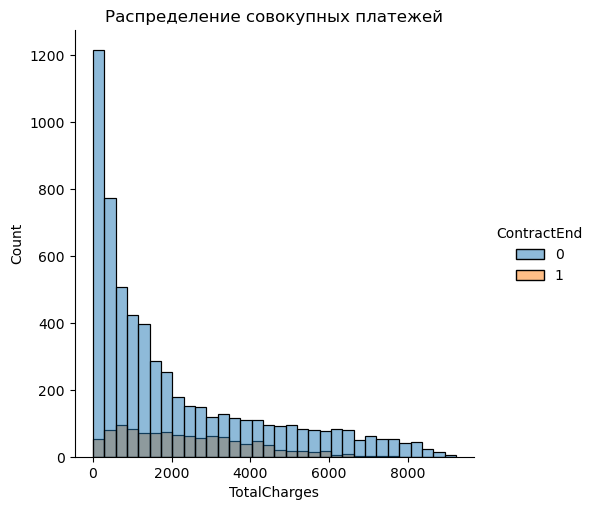

In [22]:
sns.displot(data, x='TotalCharges', hue='ContractEnd').set(
    title='Распределение совокупных платежей');

/var/folders/x8/094w_9t16wd6cl_75x01cqpw0000gn/T/ipykernel_18457/852618343.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation=25)
/var/folders/x8/094w_9t16wd6cl_75x01cqpw0000gn/T/ipykernel_18457/852618343.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot3.set_xticklabels(plot3.get_xticklabels(), rotation=25)


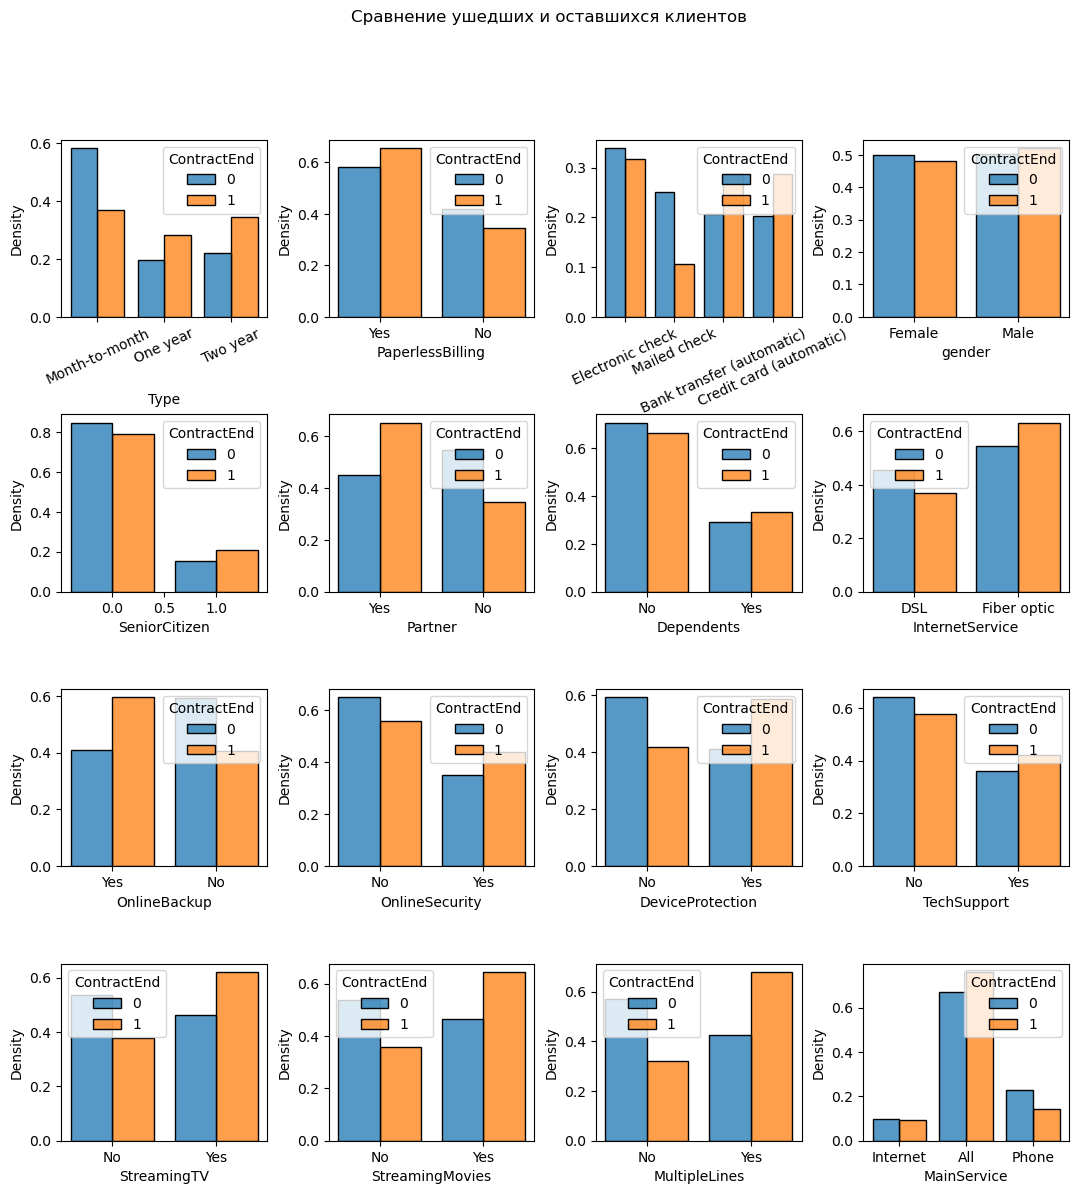

In [23]:
fig, axes = plt.subplots(4, 4, figsize=(13, 13))
plt.subplots_adjust(wspace=0.3, hspace=0.55)
fig.suptitle('Сравнение ушедших и оставшихся клиентов')

plot1 = sns.histplot(data, ax=axes[0, 0], x='Type', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=25)

sns.histplot(data, ax=axes[0, 1], x='PaperlessBilling', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

plot3 = sns.histplot(data, ax=axes[0, 2], x='PaymentMethod', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=25)

sns.histplot(data, ax=axes[0, 3], x='gender', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[1, 0], x=data['SeniorCitizen'].astype('category'), hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[1, 1], x='Partner', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[1, 2], x='Dependents', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[1, 3], x='InternetService', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[2, 0], x='OnlineBackup', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[2, 1], x='OnlineSecurity', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[2, 2], x='DeviceProtection', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[2, 3], x='TechSupport', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[3, 0], x='StreamingTV', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[3, 1], x='StreamingMovies', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[3, 2], x='MultipleLines', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

sns.histplot(data, ax=axes[3, 3], x='MainService', hue='ContractEnd',
             multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False);

Из проведённого анализа можно заметить, что:
- Среди оставшихся клиентов преобладают новые клиенты;
- Среди ушедших клиентов преобладают клиенты с наибольшими ежемесячными платежами;
- Среди ушедших клиентов больше клиентов с долгосрочным планом (год и больше), у оставшихся клиентов преобладает ежемесячный план;
- Среди ушедших клиентов доля клиентов с автоматическим продлением платежей выше, чем у оставшихся;
- Среди ушедших клиентов доля клиентов с электронным чеком выше, оставшие клиенты больше предпочитают бумажный чек;
- У ушедших клиентов больше дополнительных услуг, чем у оставшихся.

## Построение модели предсказания оттока клиентов

### Отбор признаков

Сначала отделю таргет от признакового пространства

In [24]:
features = data.drop(['ContractEnd'], axis=1)

target = data['ContractEnd']

features.shape, target.shape

((7043, 22), (7043,))

Удалю признаки без содержательного смысла

In [25]:
features = features.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

features.shape

(7043, 19)

В силу особенностей некоторых библиотек задам категориальным переменым тип данных category

In [26]:
# список категориальных переменных

cat_features = list(set(features.columns) - {'MonthlyCharges', 'TotalCharges', 'Duration'})
cat_features

['PaymentMethod',
 'Partner',
 'InternetService',
 'MultipleLines',
 'Dependents',
 'StreamingMovies',
 'OnlineBackup',
 'OnlineSecurity',
 'PaperlessBilling',
 'SeniorCitizen',
 'TechSupport',
 'gender',
 'Type',
 'MainService',
 'DeviceProtection',
 'StreamingTV']

In [27]:
features[cat_features] = features[cat_features].astype('category')

features.dtypes

Type                category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
MultipleLines       category
Duration               int64
MainService         category
dtype: object

Проверю признаки на мультиколлинеарность

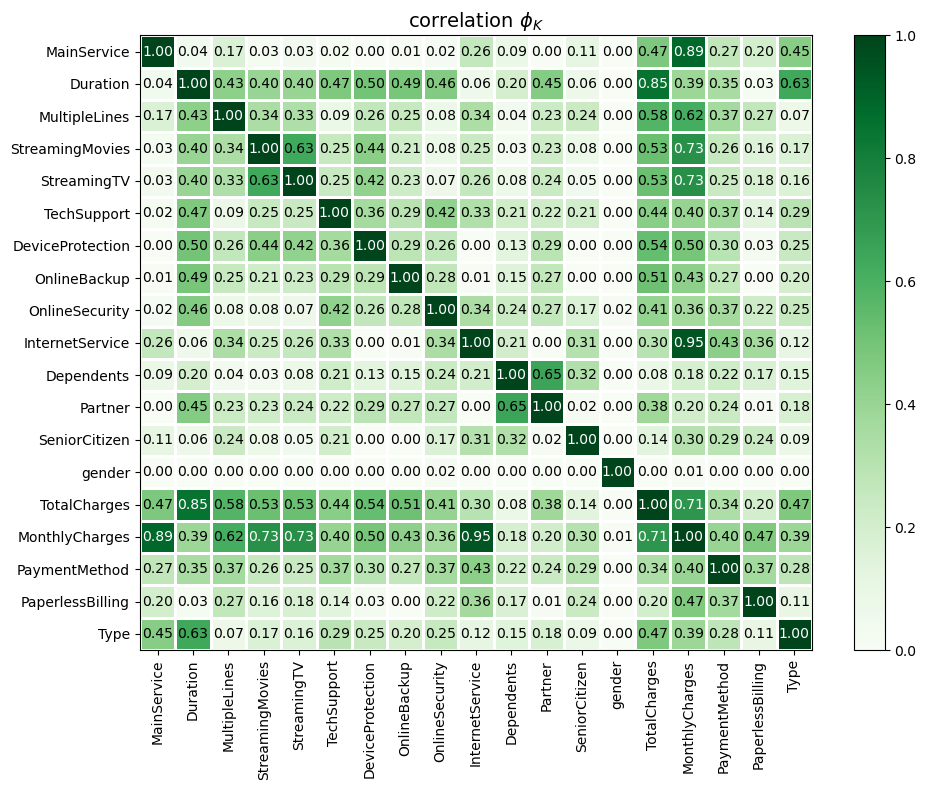

In [28]:
# построю корреляционную матрицу

interval_cols = ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Duration']
phik_overview = features.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 8))
plt.tight_layout()

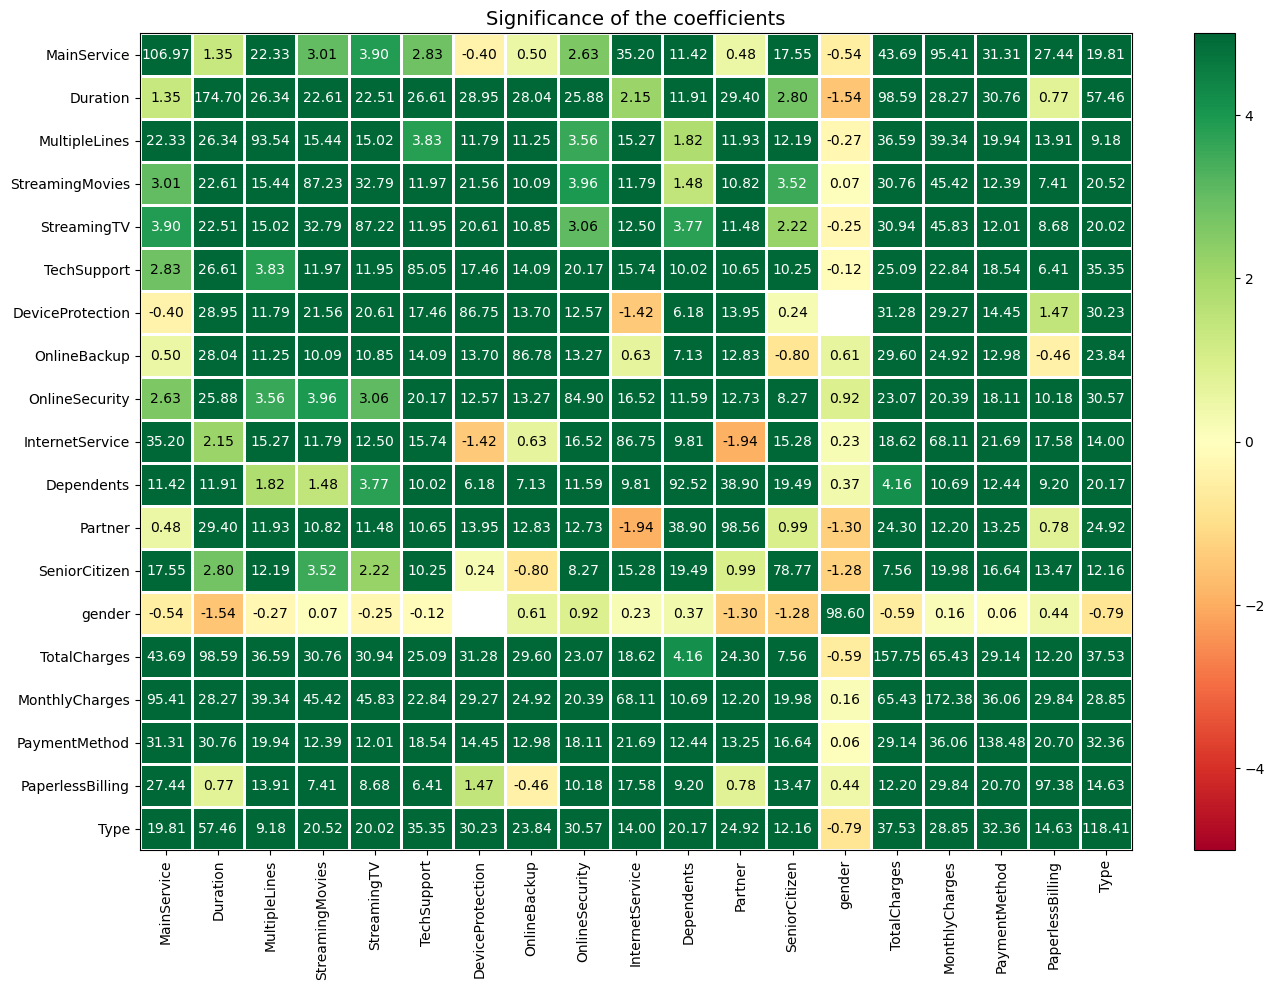

In [29]:
# построю матрицу статистической значимости корреляций

significance_overview = features.significance_matrix(interval_cols=interval_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1, figsize=(14, 10))
plt.tight_layout()

/Users/artemtarasov/anaconda3/lib/python3.10/site-packages/phik/phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


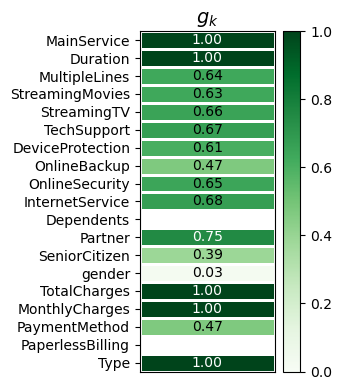

In [30]:
# построю глобальные корреляции

global_correlation, global_labels = features.global_phik(interval_cols=interval_cols)

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="Greens", title=r"$g_k$",
                        fontsize_factor=1)
plt.tight_layout()

Заметна сильная положительная корреляция между месячными платежами и типом интернет-подключения, видом основных услуг, наличия стриминга и ТВ. Также заметна сильная положительная корреляция между длительностью действия договора и суммой общих платежей. Исключу из признакового пространства суммы месячных платежей. Оставлю только совокупные платежи, т.к. это один из немногих количественных признаков. Проблему мультиколлинеарности в линейных моделях буду решать с помощью регуляризации.

In [31]:
features = features.drop(['MonthlyCharges'], axis=1)

features.shape

(7043, 18)

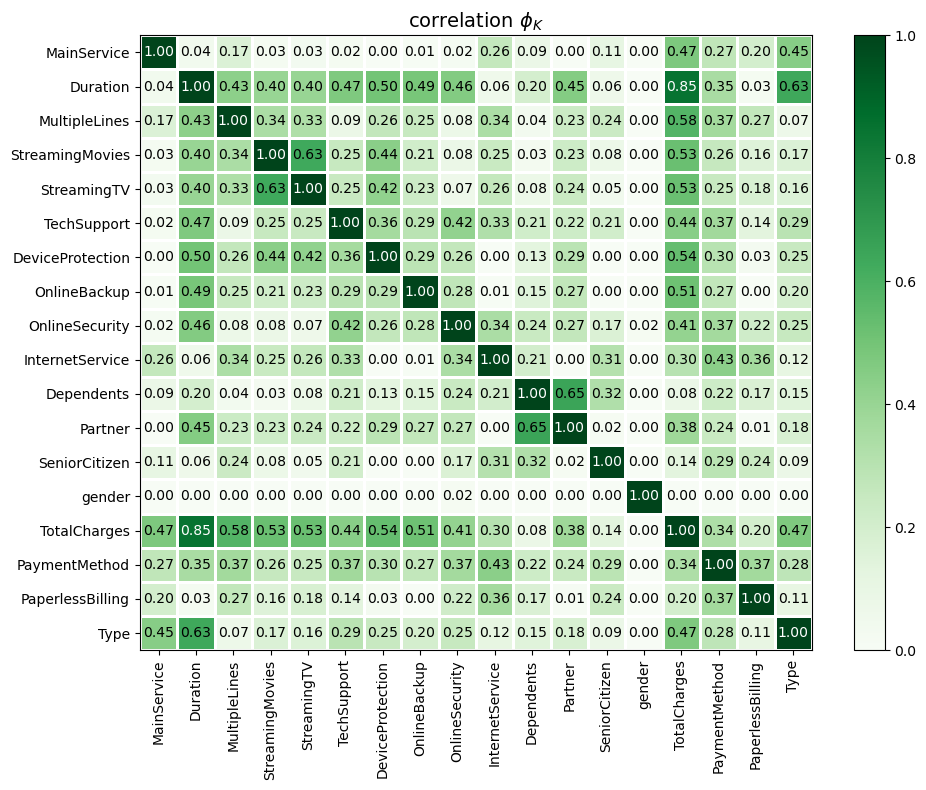

In [32]:
# снова построю корреляционную матрицу

interval_cols = ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Duration']
phik_overview = features.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 8))
plt.tight_layout()

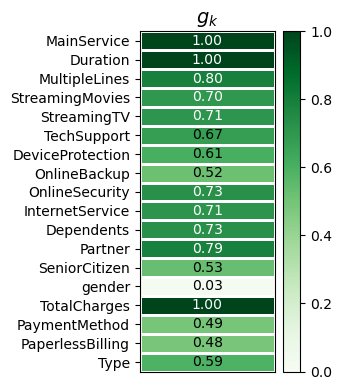

In [33]:
# снова построю глобальные корреляции

global_correlation, global_labels = features.global_phik(interval_cols=interval_cols)

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="Greens", title=r"$g_k$",
                        fontsize_factor=1)
plt.tight_layout()

### Деление на выборки

Разделю наш датасет на тренировочную и тестовую выборки в соотношение 0.75/0.25. Выделять валидационную выборку не буду, т.к. во время обучения моделей буду применять кросс-валидацию.

In [34]:
# задам нужный нам random state в качестве глобальной переменной

random_state = np.random.seed(20623)

In [35]:
# разделю таргет и признаки на семплы
# для сохранения первоначального дисабаланса целевого признака применю стратификацию

features_train, features_test, target_train, target_test = train_test_split(
    features, target,
    test_size=.25,
    stratify=target,
    random_state=random_state)

print(features_train.shape, features_test.shape)
print(target_train.shape, target_test.shape)

(5282, 18) (1761, 18)
(5282,) (1761,)


### Обучение моделей

#### Логистическая регрессия

In [36]:
features_train.dtypes

Type                category
PaperlessBilling    category
PaymentMethod       category
TotalCharges         float64
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
MultipleLines       category
Duration               int64
MainService         category
dtype: object

In [37]:
%%time

# создам преобразователь для категориальных переменных
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# создам преобразователь для количественных переменных
numeric_transformer = StandardScaler()

# объединю оба преобразователя в один
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selector(dtype_exclude='category')),
        ('cat', categorical_transformer, selector(dtype_include='category'))
    ] 
)

# задам модель
model = LogisticRegression(
    random_state=random_state, class_weight='balanced')

# создам pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', model)])

# задам коэффициенты регулиризации для перебора
params = {'model__C': np.arange(50, 1000, 50)}

# передам параметры модели в GridSearchCV (gs - grid search, lr - logistic regression)
gs_lr = GridSearchCV(pipe, param_grid=params, scoring='roc_auc', cv=4)

# обучу модель
gs_lr.fit(features_train, target_train)

# Выведу лучший коэффициент регулиризации
gs_lr.best_params_

CPU times: user 22.7 s, sys: 291 ms, total: 23 s
Wall time: 3.04 s


{'model__C': 150}

In [38]:
# выведу лучший score
gs_lr.best_score_

0.7662632242703374

#### Случайный лес

In [39]:
%%time

# создам преобразователь для категориальных переменных
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='None'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)

# создад преобразователь для количественных переменных
numeric_transformer = StandardScaler()

# объединю оба преобразователя в один
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selector(dtype_exclude='category')),
        ('cat', categorical_transformer, selector(dtype_include='category'))
    ] 
)

# выберу модель
model = RandomForestClassifier(
    random_state=random_state, class_weight='balanced')

# создам pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', model)])

# настрою параметры модели для перебора
params = {'model__max_depth': np.arange(5, 25),
          'model__n_estimators': np.arange(100, 251, 10)}

# передам параметры модели в GridSearchCV (gs - grid search, rfc - random forest classifier)
gs_rfc = GridSearchCV(pipe, param_grid=params, scoring='roc_auc', cv=4)

# обучу модель
gs_rfc.fit(features_train, target_train)

# выведу лучшие параметры
gs_rfc.best_params_

CPU times: user 7min 34s, sys: 3.47 s, total: 7min 38s
Wall time: 7min 38s


{'model__max_depth': 7, 'model__n_estimators': 200}

In [40]:
gs_rfc.best_score_

0.8283767317890328

#### Градиентный бустинг

In [42]:
%%time

# задам модель
model = lgb.LGBMClassifier(
    random_seed=random_state, boosting_type='gbdt', verbosity=-1, class_weight='balanced')

# задам параметры модели для перебора
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': np.arange(3, 25),
    'n_estimators': np.arange(100, 271, 10)
}

# передам параметры модели в GridSearchCV
gs_lgb = GridSearchCV(model, param_grid=params, cv=4, scoring='roc_auc')

# обучу модель
gs_lgb.fit(features_train, target_train)

CPU times: user 1h 45min 30s, sys: 10min 48s, total: 1h 56min 19s
Wall time: 14min 48s


GridSearchCV(cv=4,
             estimator=LGBMClassifier(class_weight='balanced', random_seed=None,
                                      verbosity=-1),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24]),
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270])},
             scoring='roc_auc')

In [43]:
# выведу лучшие параметры
gs_lgb.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 270}

In [44]:
# выведу score модели
gs_lgb.best_score_

0.9017091073971708

#### Константная модель

In [45]:
# задам модель
model = DummyClassifier(strategy='most_frequent', random_state=random_state)

# Обучу модель через кросс-валидацию. Выходная метрика - ROC-AUC. Количество подвыборок - 4.
scores = cross_val_score(model, features_train, target_train, cv=4, scoring='roc_auc')

# усредню полученную метрику
dc_score = scores.mean()
dc_score

0.5

Все вышепостроенные модели являются адекватными, т.к. их метрики превосходят константную модель

#### Выбор лучшей модели

Сравню построенные модели

In [46]:
results = pd.DataFrame(columns=['model', 'parameters', 'score'])
results['model'] = ['LogisticRegression', 'RandomForestClassifier', 'LGBMClassifier']
results['score'] = [gs_lr.best_score_, gs_rfc.best_score_, gs_lgb.best_score_]
results['parameters'] = [gs_lr.best_params_, gs_rfc.best_params_, gs_lgb.best_params_]
results.sort_values(by='score', ascending=False)

,model,parameters,score
2,LGBMClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.901709
1,RandomForestClassifier,"{'model__max_depth': 7, 'model__n_estimators':...",0.828377
0,LogisticRegression,{'model__C': 150},0.766263


Таким образом, лучшей модели оказалась LGBMClassifier

#### Тестрование модели

In [47]:
# задам модель
model = lgb.LGBMClassifier(
    random_seed=random_state,
    boosting='gbdt',
    verbosity=-1,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=270,
    class_weight='balanced'
)

# обучение модели
model.fit(features_train, target_train)

# расчёт метрики ROC-AUC на тестовой выборке
roc_auc_score(target_test, model.predict_proba(features_test)[:,1])

0.8951596720910314

In [48]:
# функция для построения ROC-кривой

def roc_graph(target, probabilities_one):
    fpr, tpr, thresholds = roc_curve(target, probabilities_one)
    plt.figure()
    plt.plot(fpr, tpr, color="darkorange") 
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-кривая") 
    plt.grid()
    plt.show()

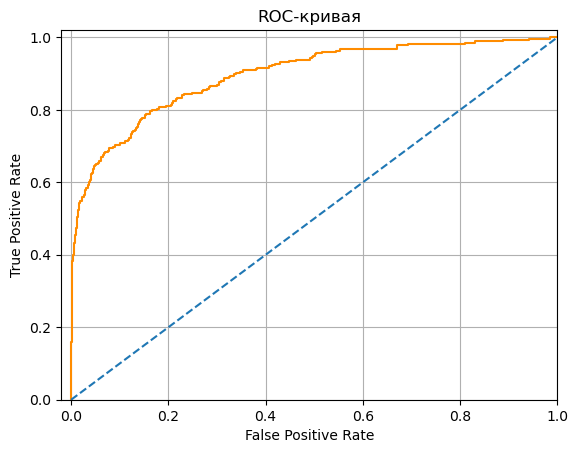

In [49]:
# построю ROC-кривую

roc_graph(target_test, model.predict_proba(features_test)[:,1])

In [50]:
# расчёт метрики accuracy на тестовой выборке
accuracy_score(target_test, model.predict(features_test))

0.8489494605337876

In [51]:
# вывод confusion matrix на тестовой выборке
confusion_matrix(target_test, model.predict(features_test), normalize='true')

array([[0.86742934, 0.13257066],
       [0.25090909, 0.74909091]])

**Вывод:**

Модель градиентного бустинга прошла проверку на тестовой выборке и показала метрику roc_auc 0.895, что превышает пороговое значение 0.85. Accuracy модели равна 0.849. Модель угадывает более 87% клиентов, которые действительно расторгли договор, однако среди действующих клиентов модель неправильно предсказала уход для 25% клиентов. Т.к. действующих абонентов гораздо больше ушедших, такое количество False Positive клиентов может существенно увеличить затраты на маркетинговые компании.

#### Анализ важности признаков

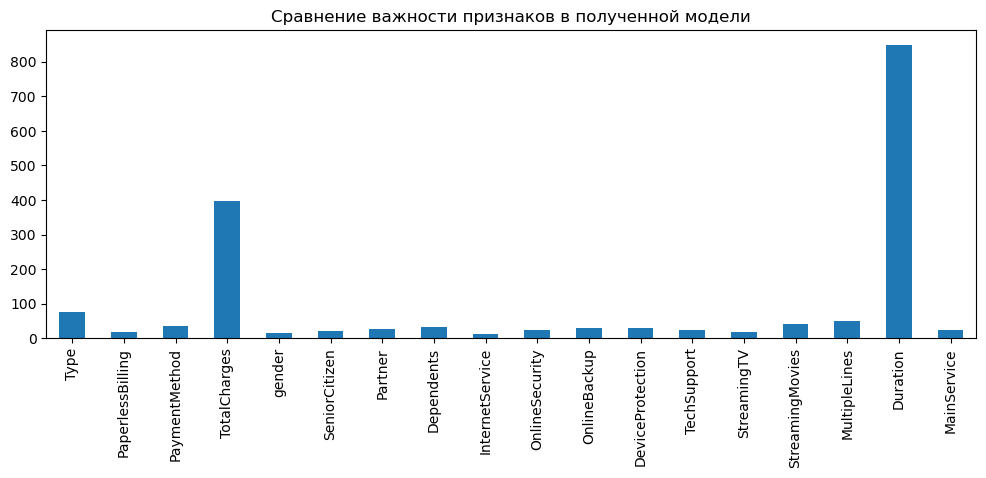

In [52]:
importances = pd.Series(gs_lgb.best_estimator_.feature_importances_, index=features.columns)

importances.plot(
    kind='bar',
    figsize=(12, 4),
    title='Сравнение важности признаков в полученной модели'
);

Среди всех признаков наиболее выделяется длительность пользования услугами, далее следует общая сумма платежей.

## Заключение

В ходе выполнения исследования были успешно выполнены все запланированные этапы.
Среди возникших сложностей можно выделить следующие:
1. Мультиколлинеарность признаков. Справиться с ней помогли исключение признака из модели, а также регулиризация модели (в частности, логистической регрессии).  
2. Не все кодировщики категориальных признаков справляются с пропусками в данных, в частности OrdinalEncoder. Справиться с данной проблемой помог SimpleImputer, с помошью которого все пропуски были заполнены значением -1.  

Ключевые шаги в решении задачи:
1. Загрузка данных и первичный анализ;  
2. Объединение данных;  
3. Создание синтетических признаков;  
4. Когортный анализ;  
5. Отбор признаков и проверка на мультиколлинеарность;  
6. Разбивка на подвыборки;  
7. Инициализация моделей;  
8. Обучение модель на кросс-валидации и подбор лучших гиперпараметров;  
9. Сравнение с константной моделью;  
10. Выбор лучшей модели;  
11. Тестирование модели на тестовой ввыборке;  
12. Общий вывод о принятии модели, а также расчёт дополнительных метрик;  
13. Вывод важности признаков.  

В ходе исследования была получена модель, которая правильно предсказывает 85% случаев (остаётся клиент или уходит). Модель угадывает более 87% клиентов, которые действительно расторгли договор, однако среди действующих клиентов модель неправильно предсказала уход для 25% клиентов. Т.к. действующих абонентов гораздо больше ушедших, такое количество False Positive клиентов может существенно увеличить затраты на маркетинговые компании.


Наиболее важными признаками в модели оказались длительность договора и совокупные платежи. Однако, по данным признакам сложно увидеть причины ухода клиентов. В ходе сравнения оставшихся и ушедших клиентов я бы советовал сделать акцент на следующих пунктах:
- Среди оставшихся клиентов преобладают новые клиенты с низкими ежемесячными платежами, а среди ушедших клиентов преобладают клиенты с наибольшими ежемесячными платежами. Возможно, ушедшие клиенты недовольны ценовой политикой компании.
- Среди ушедших клиентов больше клиентов с долгосрочным планом (год и больше), у оставшихся клиентов преобладает ежемесячный план. Почему клиентам с долгосрочными контрактами проще разорвать договор, чем клиентам с ежемесячными платежами?
- Среди ушедших клиентов доля с автоматическим продлением платежей выше, чем у оставшихся. Возможно, клиенты недовольны реализацией данной опции. Приходят ли клиентам оповещения, что деньги скоро будут списаны?
- У ушедших клиентов больше дополнительных услуг, чем у оставшихся. Пользуются ли клиенты всеми дополнительными услугами, что увеличивают ежемесячные платежи, либо услуги являются навязанныи или включёнными без чёткого согласия клиента?

Дополнительные данные, которые можно получить в ходе ответов на вышестоящие вопросы, помогли бы улучшить модель прогнозирования оттока клиентов, а также ответить на главный вопрос: почему клиенты уходят?